In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [6]:
from keras.datasets import cifar10

In [39]:
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [41]:
%matplotlib inline 
import matplotlib.pyplot as plt

[0]


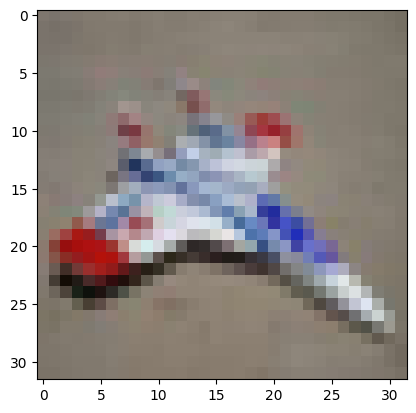

In [42]:
print(y_train[30])
plt.imshow(X_train[30])
plt.show()

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [59]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.025))


model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,073 (1.57 MB)

 Trainable params: 411,073 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
y_ap = y_train == 0

%time history = model.fit(X_train, y_ap, batch_size=128, epochs=30, validation_split=0.3, shuffle=True)

Epoch 1/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 38s 136ms/step - accuracy: 0.8947 - loss: 0.3478 - val_accuracy: 0.9051 - val_loss: 0.2514
Epoch 2/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 37s 135ms/step - accuracy: 0.9114 - loss: 0.2436 - val_accuracy: 0.9119 - val_loss: 0.2408
Epoch 3/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 37s 135ms/step - accuracy: 0.9172 - loss: 0.2150 - val_accuracy: 0.9233 - val_loss: 0.2176
Epoch 4/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 37s 135ms/step - accuracy: 0.9310 - loss: 0.1822 - val_accuracy: 0.9343 - val_loss: 0.1748
Epoch 5/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 39s 142ms/step - accuracy: 0.9353 - loss: 0.1690 - val_accuracy: 0.9349 - val_loss: 0.1730
Epoch 6/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 48s 175ms/step - accuracy: 0.9389 - loss: 0.1605 - val_accuracy: 0.9366 - val_loss: 0.1969
Epoch 7/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 47s 173ms/step - accuracy: 0.9452 - loss: 0.1434 - val_accuracy: 0.9399 - val_loss: 0.1826
Epoch 8/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 49s 178ms/step - accuracy: 0.9490 - loss: 0

In [62]:
train_loss, train_accuracy = model.evaluate(X_train, y_ap, batch_size=32)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9971 - loss: 0.0150


In [63]:
y_test_ap = y_test == 0
train_loss, train_accuracy = model.evaluate(X_test, y_test_ap, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9601 - loss: 0.2176


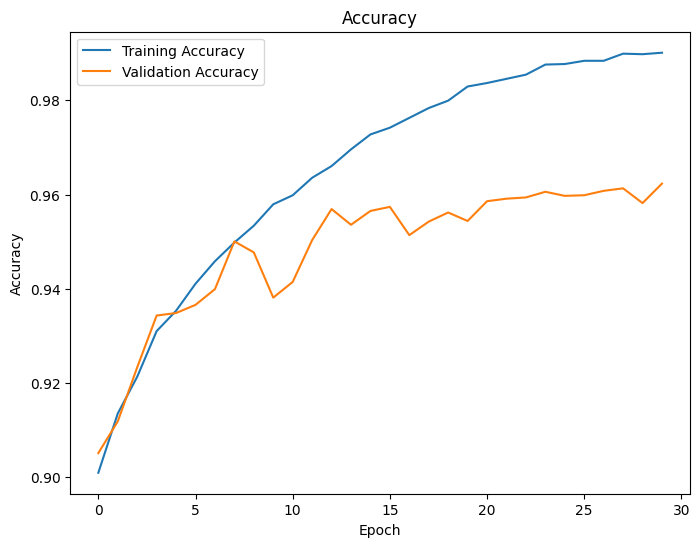

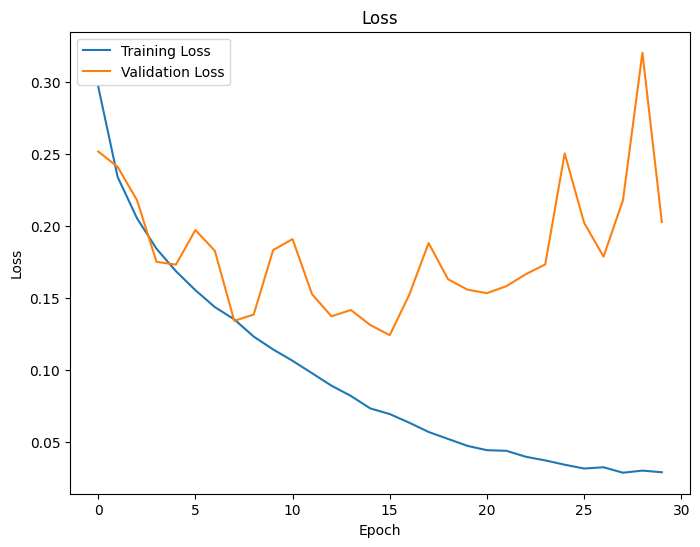

In [64]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [65]:
model.save("planedetectot.h5")